In [14]:
import numpy as np
import pandas as pd
import sklearn
%matplotlib inline

In [15]:
path = './data/election-context-2018.csv'
data = pd.read_csv(path)

In [16]:
data

,state,county,fips,trump16,clinton16,otherpres16,romney12,obama12,otherpres12,demsen16,...,age29andunder_pct,age65andolder_pct,median_hh_inc,clf_unemploy_pct,lesshs_pct,lesscollege_pct,lesshs_whites_pct,lesscollege_whites_pct,rural_pct,ruralurban_cc
0,Alabama,Autauga,1001,18172,5936,865,17379,6363,190,6331.0,...,40.037058,13.978456,53099.0,5.591657,12.417046,75.407229,10.002112,74.065601,42.002162,2.0
1,Alabama,Baldwin,1003,72883,18458,3874,66016,18424,898,19145.0,...,35.474412,18.714851,51365.0,6.286843,9.972418,70.452889,7.842227,68.405607,42.279099,3.0
2,Alabama,Barbour,1005,5454,4871,144,5550,5912,47,4777.0,...,37.664387,16.528895,33956.0,12.824738,26.235928,87.132213,19.579752,81.364746,67.789635,6.0
3,Alabama,Bibb,1007,6738,1874,207,6132,2202,86,2082.0,...,37.329435,14.885699,39776.0,7.146827,19.301587,88.000000,15.020490,87.471774,68.352607,1.0
4,Alabama,Blount,1009,22859,2156,573,20757,2970,279,2980.0,...,37.240053,17.192916,46212.0,5.953833,19.968585,86.950243,16.643368,86.163610,89.951502,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3109,Wyoming,Sweetwater,56037,12154,3231,1745,11428,4774,693,NaN,...,44.153352,9.417120,68233.0,5.072255,9.314606,78.628507,6.238463,76.606813,10.916313,5.0
3110,Wyoming,Teton,56039,3921,7314,1392,4858,6213,393,NaN,...,35.569995,11.837510,75594.0,2.123447,4.633570,46.211584,1.526877,41.769504,46.430920,7.0
3111,Wyoming,Uinta,56041,6154,1202,1114,6615,1628,296,NaN,...,43.205858,10.678218,53323.0,6.390755,10.361224,81.793082,8.806312,81.080852,43.095937,7.0
3112,Wyoming,Washakie,56043,2911,532,371,3014,794,136,NaN,...,34.774279,19.650341,46212.0,7.441860,12.577108,78.923920,10.299738,75.980688,35.954529,7.0


# Add a new column here, value is 1 if Trump wins majority in that county, else 0

In [17]:
def winner_2016(row):
    return 1 if row['trump16'] > row['clinton16'] else 0

# Create new columns based on existing colunms, 
### see https://stackoverflow.com/questions/26886653/pandas-create-new-column-based-on-values-from-other-columns-apply-a-function-o

In [18]:
data['winner_16'] = data.apply (lambda row: winner_2016(row), axis=1) 

In [19]:
data = data.drop(['demgov16','repgov16','othergov16'], axis=1) # these columns are all N/A

In [20]:
data

,state,county,fips,trump16,clinton16,otherpres16,romney12,obama12,otherpres12,demsen16,...,age65andolder_pct,median_hh_inc,clf_unemploy_pct,lesshs_pct,lesscollege_pct,lesshs_whites_pct,lesscollege_whites_pct,rural_pct,ruralurban_cc,winner_16
0,Alabama,Autauga,1001,18172,5936,865,17379,6363,190,6331.0,...,13.978456,53099.0,5.591657,12.417046,75.407229,10.002112,74.065601,42.002162,2.0,1
1,Alabama,Baldwin,1003,72883,18458,3874,66016,18424,898,19145.0,...,18.714851,51365.0,6.286843,9.972418,70.452889,7.842227,68.405607,42.279099,3.0,1
2,Alabama,Barbour,1005,5454,4871,144,5550,5912,47,4777.0,...,16.528895,33956.0,12.824738,26.235928,87.132213,19.579752,81.364746,67.789635,6.0,1
3,Alabama,Bibb,1007,6738,1874,207,6132,2202,86,2082.0,...,14.885699,39776.0,7.146827,19.301587,88.000000,15.020490,87.471774,68.352607,1.0,1
4,Alabama,Blount,1009,22859,2156,573,20757,2970,279,2980.0,...,17.192916,46212.0,5.953833,19.968585,86.950243,16.643368,86.163610,89.951502,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3109,Wyoming,Sweetwater,56037,12154,3231,1745,11428,4774,693,NaN,...,9.417120,68233.0,5.072255,9.314606,78.628507,6.238463,76.606813,10.916313,5.0,1
3110,Wyoming,Teton,56039,3921,7314,1392,4858,6213,393,NaN,...,11.837510,75594.0,2.123447,4.633570,46.211584,1.526877,41.769504,46.430920,7.0,0
3111,Wyoming,Uinta,56041,6154,1202,1114,6615,1628,296,NaN,...,10.678218,53323.0,6.390755,10.361224,81.793082,8.806312,81.080852,43.095937,7.0,1
3112,Wyoming,Washakie,56043,2911,532,371,3014,794,136,NaN,...,19.650341,46212.0,7.441860,12.577108,78.923920,10.299738,75.980688,35.954529,7.0,1


# Note: There are a number of counties not holding elections in 2018, if we want to have a model to prediction senator, house and president all at once, we will need to drop some more rows.

In [21]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()

In [22]:
training_set = data.iloc[:, 20:] # features starting at index 20 after dropping 3 N/A columns

In [23]:
training_set = training_set.dropna() 

In [24]:
x = training_set.iloc[:, :-1]
y = training_set.iloc[:, -1:]

In [25]:
clf = clf.fit(x, y)

In [26]:
colunms = list(training_set)[:-1]

In [27]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("election") 

'election.pdf'

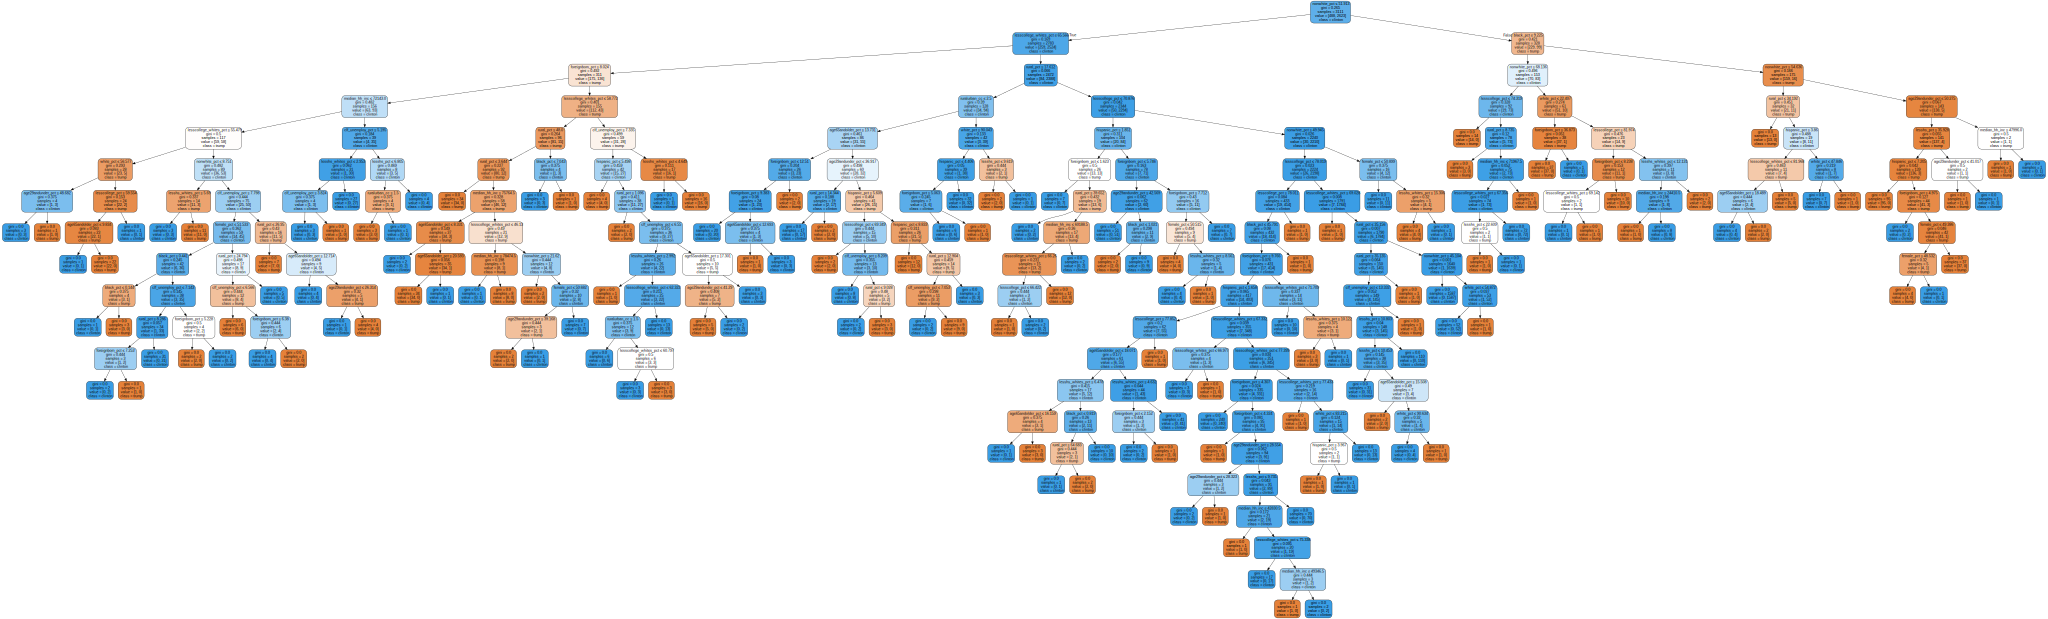

In [28]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=colunms,  
                     class_names=['trump', 'clinton'],  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("election_tree") #create the image below as a pdf file under this folder
graph